# *Assignment #5*
**Note:** This counts as our **Midterm Exam**

## **[CSCI 581](https://www.ecst.csuchico.edu/~bjuliano/csci581/)**, Spring 2022

Jayaa Emekar

## Predicting passenger survival on the *Titanic*

Based on the [*Titanic - Machine Learning from Disaster*](https://www.kaggle.com/c/titanic) challenge from [Kaggle](https://www.kaggle.com/).
The dataset is from the [Vanderbilt Biostatistics Datasets](https://hbiostat.org/data/).

## Overview

In this challenge you will use machine learning to create a model that predicts which passengers survived the *Titanic* shipwreck.

The sinking of the *Titanic* is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered "unsinkable" *RMS Titanic* sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

![RMS Titanic](https://www.history.com/.image/c_limit%2Ccs_srgb%2Cfl_progressive%2Ch_2000%2Cq_auto:good%2Cw_2000/MTU3ODc5MDg2Njk4ODAwNDU3/rms-sailing-from-southampton.jpg)

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, you will build a predictive model that answers the question: "What are the attributes of the people who were more likely to survive the sinking of the *Titanic*?" using passenger data (*i.e.* name, age, gender, socio-economic class, *etc.*).

## Data

In this challenge, you will use a dataset that include passenger information like name, age, gender, socio-economic class, *etc*. This dataset is available as a file named [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv).

The file [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv) contains the details of the 1309 passengers on board and importantly, will reveal whether they survived or not.
The dataset file details include:

*   `pclass`: passenger class; proxy for socio-economic status (1st ~ upper, 2nd ~ middle, 3rd ~ lower)
*   `survived`: survival status (0=No, 1=Yes)
*   `name`: passenger name
*   `sex`: passenger sex (male, female)
*   `age`: passenger age in years (fractional if age is less than 1; if age is estimated, it is in the form xx.5)
*   `sibsp`: number of siblings/spouses aboard (includes step-siblings; mistresses and fiances ignored)
*   `parch`: number of parents/children aboard (parent only considers mother or father; child includes stepchildren)
*   `ticket`: ticket number
*   `fare`: passenger fare (in pre-1970 British pounds)
*   `cabin`: cabin number
*   `embarked`: port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)
*   `boat`: lifeboat number (if passenger boarded one)
*   `body`: body identification number
*   `home.dest`: passenger home/destination

Using the concepts we have covered in class so far, develop a classification system that will learn patterns in the [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv) data file and accurately predict whether a passenger will survive or not.

## Required components of your submission 

Your *Google Colab* Jupyter notebook must include:

1.   all pertinent *exploratory data analysis* (EDA) code, visualizations, and **detailed** justifications;
2.   explanations/justifications for all model selection decisions;
3.   all pertinent model diagnostics, including metrics and visualizations; and
4.   your final model equation.

Be sure to check out or review the *Assignments/Projects* section of our [*Blackboard*](https://learn.csuchico.edu/) course page for details regarding expectations, requirements, and the [*Jupyter Notebook Rubric*](https://www.ecst.csuchico.edu/~bjuliano/Teaching/rubric-jupyter-notebook.pdf) that will be used to evaluate Jupyter notebook submissions.



# Solution

## Exploratory data analysis, visualizations, and justifications

##### Imports Required 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

##### Overview of the Dataset

Read the titanic dataset into the dataframe

In [2]:
df = pd.read_csv("https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv")


Print the column values of the dataset

In [3]:
print(df.columns.values)


['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest']


There are 14 columns present in the dataset.

Check the head data of the dataset

In [4]:
print(df.head())


   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  


check information of the dataset variables
The below table shows the overview of each variable, such as datatype, not null values


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


check description of the dataset variables

The below table shows the overview of each variable, such as mean, standard deviation, minimum and maximum values.


In [6]:
print(df.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


### Checking missing values

Check if there is any missing values in the dataset

In [7]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

From the above table describing the number of null data in each column.

we can see that the rates of null in cabin, boat, body and home.dest are very high, considering the dataset having 1309 observations. 
I will deal with the missing values later in Tidying data section later.

##### Observation till now

We can see that: *
1. We have 14 columns and 1309 row, or up to 14 data point about each of the 1309
passanger. 
2. Checking for possible columns to encode, we are looking for columns with a low number of catagories and not numerical. Here’s the list from the output above: 
    1. Column sex has 2 caagories, type <class 'str'> 
    2. Column embarked has 3 caagories, type <class 'str'>
    3. Column boat has 27 caagories, type <class 'str'> 
    4. Column cabin has 186 caagories, type <class 'str'> 
    5. Column home.dest has 369 caagories, type <class 'str'> 
    6. Column ticket has 929 caagories, type <class 'str'> 
    7. Column name has 1307 caagories, type <class 'str'>

Since out target column, survived, has 2 unique values: 0, or not survived, and 1, survived,
we want to use logistic regression model.

Checking for null values in each column, it may be best to remove columns with a high (>50%) number of null values to preserve the remaining rows. Here’s a list:

1. Column fare has 1 null values (or is 0.0764% null)
2. Column embarked has 2 null values (or is 0.153% null)
3. Column age has 263 null values (or is 20.1% null)
4. Column home.dest has 564 null values (or is 43.1% null)
5. Column boat has 823 null values (or is 62.9% null)
6. Column cabin has 1014 null values (or is 77.5% null)
7. Column body has 1188 null values (or is 90.8% null)

only 38.197% of passengers survived the titanc.

### Visualizations


#### survival rate vs passengers class

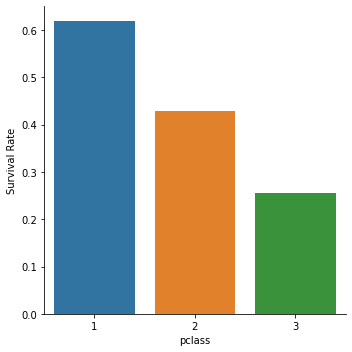

In [8]:
g1 = sns.catplot(x="pclass", y = "survived", data=df, kind="bar", ci=None, aspect=1)
g1.set_ylabels("Survival Rate")

It seems passenger class has a significant relationship with the survival rate.

Passenger class 1 has highest survival rate while  Passenger class 3 has lowest survival rate.

#### survival rate vs sex

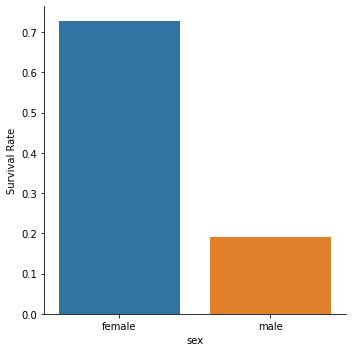

In [9]:
g2 = sns.catplot(x="sex", y = "survived", data=df, kind="bar", ci=None, aspect=1)
g2.set_ylabels("Survival Rate")

It shows a female passenger has much higher survival rate than male. 

This feature seems to be a key predictive variable.

#### survival rate vs number of siblings/spouses aboard

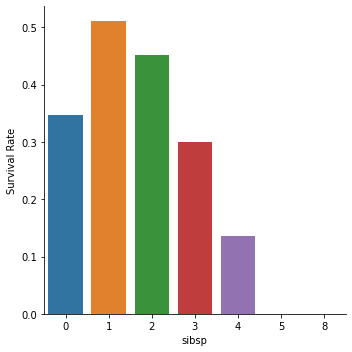

In [10]:
g3 = sns.catplot(x="sibsp", y = "survived", data=df, kind="bar", ci=None, aspect=1)
g3.set_ylabels("Survival Rate")

The chart indicates that sibsp with 1 has the highest survival rate and the rate decrease as sibsp increases.

#### survival rate vs number of parents/children aboard

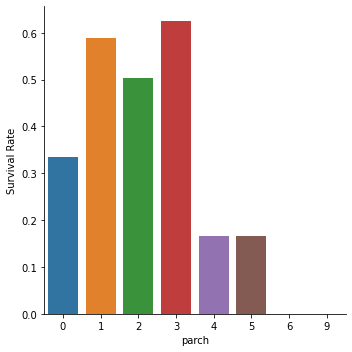

In [11]:
g4 = sns.catplot(x="parch", y = "survived", data=df, kind="bar", ci=None, aspect=1)
g4.set_ylabels("Survival Rate")

Cannot observe a distinctive pattern here, but looks like having more than 3 "parch" significantly decrease the chance of survival.

#### Histogram of age

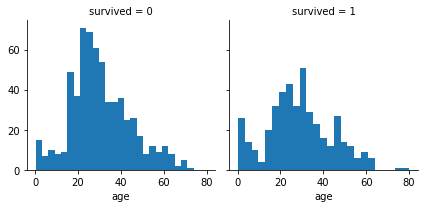

In [12]:
g5 = sns.FacetGrid(df, col="survived")
g5.map(plt.hist, "age", bins=25)

Being under 10 years old might contributed to surviving, but other than that, we cannot see a clear pattern here.

##### Histogram of fare

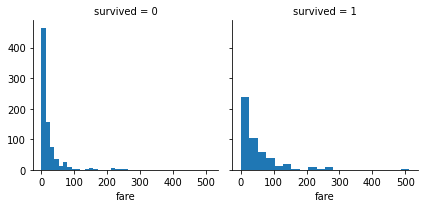

In [13]:
g6 = sns.FacetGrid(df, col="survived")
g6.map(plt.hist, "fare", bins=20)

Both histograms are right skewed. It seems that the number of people whose fare were the cheapest category (left most bar) did not survive, and looks like there are a number of people who paid a lot and survived. Fare variable might play a role in predicting the survival.

#### Tidying data


##### Missing values

1. First, I replace all the missing values in age column with its average. 
2. Second, I drop cabin, boat, body and home.dest columns because each column of these variables contains more than 40% of missing observations. 
3. Finally, I drop rows which contains a missing value in fare and embarked variables, which are just 3 rows in total.

In [14]:
print("The number of misssing values before data cleansing:\n",df.isnull().sum())


The number of misssing values before data cleansing:
 pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


Replace all the NaNs in column age with the average of column age

In [15]:
# replace all the NaNs in column age with the average of column age
df.age = df.age.fillna(df.age.mean())

Drop the column cabin, boat, body, home.dest

In [16]:
#drop cabin, boat, body, home.dest
df1 = df.drop(columns=['cabin', 'boat', 'body', 'home.dest'])

Drop rows with NaNs in fare and embarked (3 rows in total).

In [17]:
#drop rows with NaNs in fare and embarked (3 rows in total).
df2 = df1.dropna()

In [18]:
print("\nThe number of misssing values after data cleansing:\n", df2.isnull().sum())


The number of misssing values after data cleansing:
 pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


As you can see, there is no missing values in the later table.

##### Convert string into numetic type

Here, I replace string data ("male", "female") into numeric data (0, 1):

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender_encoded = le.fit_transform(df2['sex'])
df2.loc[:, 'sex'] = gender_encoded

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


##### Feature Selection with Corrlation Matrix

Here, I will see which feature correlate with the target variable with correlation matrix. 

I list top 5 variables that correlate with survival variable.

In [20]:
corr = df2.corr()

print(df2.corr().abs().nlargest(6, 'survived').index) # index shows the row label
print(df2.corr().abs().nlargest(6, 'survived').to_numpy()[:,1])

Index(['survived', 'sex', 'pclass', 'fare', 'parch', 'age'], dtype='object')
[1.         0.52724781 0.31006403 0.24296042 0.08340042 0.05213415]


It seems that the sex variable has the greatest correlation, followed by pclass, fare, parch and age.

######Plot a correlation heat map of given dataframe.

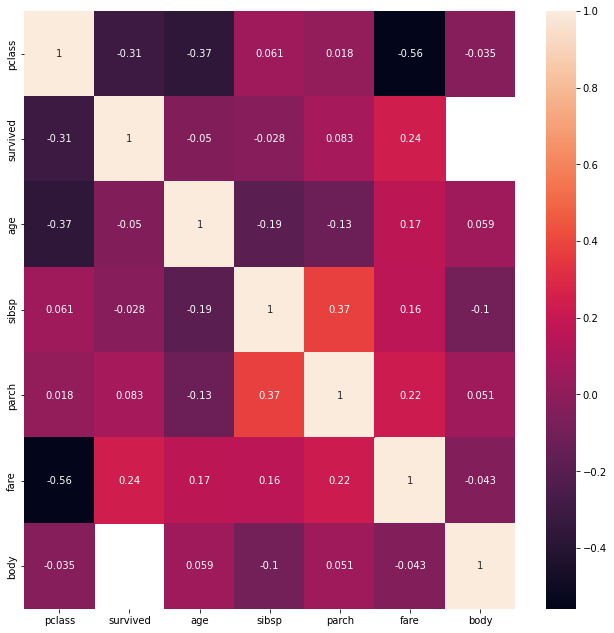

In [21]:
f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(df.corr(), annot=True)
plt.show()

Notice the strong correlation with our target column survived from the pair plot and the heatmap
is in the following order: 
1. sex = 53% 
2. pclass = 31% 
3. fare = 24% 
4. embarked = 15%

We’ll choose those for trainig our model. 

##### Split dataset into training and testing dataset

I will split dataset into training and testing dataset, with ratio of 67% and 33% respectively.

In [22]:
from sklearn.model_selection import train_test_split

features = df2.loc[:, ["pclass", "name", "sex", "age", "sibsp", "parch", "ticket", "fare", "embarked"]]
target = df2["survived"]

train_set, test_set, train_labels, test_labels = train_test_split(
                              features,               # features
                              target,             # labels
                              test_size = 0.33,          # split ratio
                              random_state = 1,          # set random seed
                              stratify = target)  # randomize based on labels

##### Model selection

Since the target is binary categorical variable, we will use a logistic regression model.

In our exploratory data analysis, we determined that passenger class, fare, age, and sex are the
most important factors. We will try use them

##### Building a model

I will build several logistic regression models with different parameters.


##### Model 1:
For the first model, 
1. I will use only 1 predictive variable to train the model. 
2. Sex variable is used since the correlation matrix shows it has the greatest correlation with survival rate.

In [23]:
from sklearn import linear_model
from sklearn import metrics
x = train_set.loc[:,["sex"]]      
y = train_labels              # 0: not-survived, 1: survived
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x, y = y)


LogisticRegression()

Get the parameters for this estimator of LogisticRegression

In [24]:
# Get the parameters for this estimator
params = log_regress.get_params()
print('Model parameters:', params)
print()

Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}



We are using above parameters indicated for this model

print out intercept and coefficients

In [25]:
#print out intercept and coefficients
print("Intercept: ", log_regress.intercept_)  
print("Coefficient: ", log_regress.coef_) 

Intercept:  [0.90500879]
Coefficient:  [[-2.28811383]]


predict the model

In [26]:
preds = log_regress.predict(X=test_set.loc[:,["sex"]])

Print and plot the confusion matrix

A type of error matrix commonly used in evaluating a supervised learning ML classification algorithm is the confusion matrix. 
This is a good way to get a closer look at our Type 1 and Type 2 errors. 

(False Positive and False Negative, respectively.)

In [27]:
print("\n---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))


---Confusion Matrix---
survived    0    1
row_0             
0         227   50
1          40  114


This is the confusion matrix for model 1, where we considered Sex as column

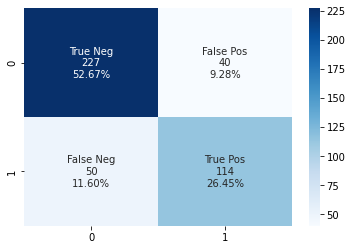

In [28]:
# Get confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(test_labels, preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Get the accuracy of the prediction


In [29]:
#---get the accuracy of the prediction---
print("\n---Accuracy---")
print(log_regress.score(X = test_set.loc[:,["sex"]] ,
                        y = test_labels))


---Accuracy---
0.7911832946635731


This Model 1 is having the accuracy of 79.19%

View summary of common classification metrics

In [30]:
# View summary of common classification metrics
print("\n---Metrices---")
print(metrics.classification_report(
      y_true = test_labels,
      y_pred = preds))


---Metrices---
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       267
           1       0.74      0.70      0.72       164

    accuracy                           0.79       431
   macro avg       0.78      0.77      0.78       431
weighted avg       0.79      0.79      0.79       431



The above table shows detailed analysis of classification report

Receiver Operating Characteristic (ROC) Curve for Model1

common metric used is the receiver operating characteristic (ROC) curve, which is based on information from the confusion matrix.
Specifically, a ROC curve is generated by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

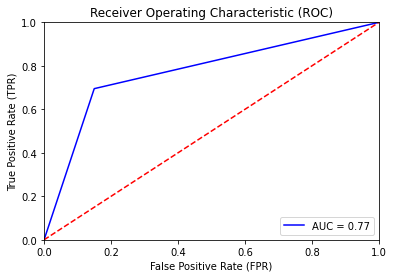

In [31]:
#---------Receiver Operating Characteristic (ROC) Curve---------
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(test_set.loc[:,["sex"]])
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(test_labels, preds)

#---find the area under the curve---
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

Using the coefficient and intercept value calculated above are as follows:

    Intercept:  [0.90500879]
    Coefficient:  [[-2.28811383]]

Using this the Model equation becomes

the sigmoid function:
$$Prob(x) = \frac{1}{1+e^{-(0.91-2.29{x})}}$$

With only one predictive variable, sex, the model produced accuracy of 79% and AUC of 0.77.

##### Model 2:
I will train the second model with pclass, sex and fare variables because they are the top 3 variables that correlate with the target variable, according to the correlation matrix above.

In [32]:
x = train_set.loc[:,["sex", "pclass","fare"]]        
y = train_labels              # 0: not-survived, 1: survived
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x, y = y)

LogisticRegression()

Get the parameters for this estimator

In [33]:
# Get the parameters for this estimator
params = log_regress.get_params()
print('Model parameters:', params)

Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Print out intercept and coefficients

In [34]:
#print out intercept and coefficients
print("Intercept: ", log_regress.intercept_)  
print("Coefficient: ", log_regress.coef_) 

Intercept:  [2.60085949]
Coefficient:  [[-2.33397561e+00 -7.76174432e-01  1.54207883e-03]]


Get the prediction for model

In [35]:
preds = log_regress.predict(X=test_set.loc[:,["sex", "pclass","fare"]])

Print and plot the confusion matrix

In [36]:
print("\n---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))


---Confusion Matrix---
survived    0    1
row_0             
0         227   50
1          40  114


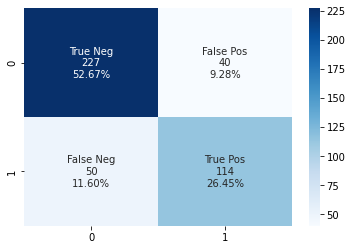

In [37]:
# Get confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(test_labels, preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Get the accuracy of the prediction

In [38]:
#---get the accuracy of the prediction---
print("\n---Accuracy---")
print(log_regress.score(X = test_set.loc[:,["sex", "pclass","fare"]] ,
                        y = test_labels))


---Accuracy---
0.7911832946635731


View summary of common classification metrics

In [39]:
# View summary of common classification metrics
print("\n---Metrices---")
print(metrics.classification_report(
      y_true = test_labels,
      y_pred = preds))


---Metrices---
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       267
           1       0.74      0.70      0.72       164

    accuracy                           0.79       431
   macro avg       0.78      0.77      0.78       431
weighted avg       0.79      0.79      0.79       431



Receiver Operating Characteristic (ROC) Curve

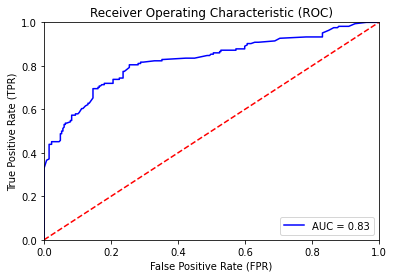

In [40]:
#---------Receiver Operating Characteristic (ROC) Curve---------

#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(test_set.loc[:,["sex", "pclass","fare"]])
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(test_labels, preds)

#---find the area under the curve---
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

Using the coefficient and intercept value calculated above are as follows:

    Intercept:  [2.60085949]
    Coefficient:  [[-2.33397561e+00 -7.76174432e-01  1.54207883e-03]]

Using this the Model equation becomes

the sigmoid function:
$$Prob(x_1, x_2, x_3) = \frac{1}{1+e^{-(2.6-2.33{x_1}-0.78{x_2}-0.0015{x_3})}}$$

With the three predictive variables, sex, pclass and fare, the model produced the same accuracy of 79%, but AUC improved to 0.83, (from 0.77 of model 1) compared to the model 1.

##### Model 3:
In the exploratory data analysis, we observed that being under 10 yeras old may have increased the chance of survival. 

So in the third model, I will make the numeric age variable into binary categorical variable, one under 10  years old and the other older that 10 years old. 

Then I include the age variable to train a model along with sex, pclass and fare variables.

In [41]:
train_set.age[train_set.age >= 10] = 0
train_set.age[train_set.age < 10] = 1

test_set.age[test_set.age >= 10] = 0
test_set.age[test_set.age < 10] = 1

x = train_set.loc[:,["sex", "pclass","fare", "age"]]        
y = train_labels              # 0: not-survived, 1: survived
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x, y = y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

LogisticRegression()

Get the parameters for this estimator

In [42]:
# Get the parameters for this estimator
params = log_regress.get_params()
print('Model parameters:', params)
print()

Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}



Print out intercept and coefficients

In [43]:
#print out intercept and coefficients
print("Intercept: ", log_regress.intercept_)  
print("Coefficient: ", log_regress.coef_)

Intercept:  [2.60048375]
Coefficient:  [[-2.33397762e+00 -7.76104831e-01  1.54275326e-03  2.34747151e-04]]


Predict the model

In [44]:
preds = log_regress.predict(X=test_set.loc[:,["sex", "pclass","fare", "age"]])

Print and plot the confusion matrix

In [45]:
print("\n---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))


---Confusion Matrix---
survived    0    1
row_0             
0         227   50
1          40  114


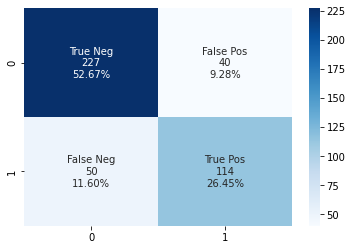

In [46]:
# Get confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(test_labels, preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Get the accuracy of the prediction

In [47]:
#---get the accuracy of the prediction---
print("\n---Accuracy---")
print(log_regress.score(X = test_set.loc[:,["sex", "pclass","fare", "age"]] ,
                        y = test_labels))


---Accuracy---
0.7911832946635731


View summary of common classification metrics

In [48]:
# View summary of common classification metrics
print("\n---Metrices---")
print(metrics.classification_report(
      y_true = test_labels,
      y_pred = preds))


---Metrices---
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       267
           1       0.74      0.70      0.72       164

    accuracy                           0.79       431
   macro avg       0.78      0.77      0.78       431
weighted avg       0.79      0.79      0.79       431



Receiver Operating Characteristic (ROC) Curve

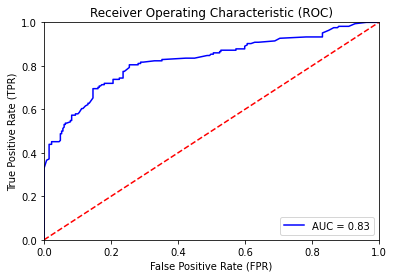

In [49]:
#---------Receiver Operating Characteristic (ROC) Curve---------
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(test_set.loc[:,["sex", "pclass","fare", "age"]])
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(test_labels, preds)

#---find the area under the curve---
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

Using the coefficient and intercept value calculated above are as follows:

    Intercept:  [2.60048375]
    Coefficient:  [[-2.33397762e+00 -7.76104831e-01  1.54275326e-03  2.34747150e-04]]

Using this the Model equation becomes

the sigmoid function:
$$Prob(x_1, x_2, x_3, x_4) = \frac{1}{1+e^{-(2.6-2.33{x_1}-0.78{x_2}-0.0015{x_3}-0.00023{x_4})}}$$

Despite the age variable being added to the model, it did not improve accuracy and AUC values, compared to model 2. By looking at the coefficient of age variable, it is very small compared to sex and pclass variables, which shows the age variable does not have a significant influence for the model. 

##### Conclusion
In this assignment, I built a logistic regression model that predict the survival of Titanic passengers. 
1. From the exploratory data analysis and correlation matrix, sex and passenger class varriables, along with a few other features, seemed to impact the chance of survival. 
2. I built three models to compare their performance. 
3. Model 1 was built with only sex variable, model 2 with three variables, and model 3 with four variables. 
4. By looking at the accuracy and AUC values, model 2 produced a better result than model 1, which indicates having three predictive features is better than having just one. 
5. Although model 2 and model 3 produced the same performance, model 2 is less complex as it uses only three predictive variables. 
6. I will conclude that model 2 is the best model to predict survival of titanic passengers.

The final model equation:
$$Prob(x_1, x_2, x_3) = \frac{1}{1+e^{-(2.6-2.33{x_1}-0.78{x_2}-0.0015{x_3})}}$$